# Algoritmi e Strutture Dati


# TODO
- formule latex - gia' funzionano, in markdown: $c = \sqrt{a^2 + b^2}$
- slider
- plot easy
- TOC per github https://github.com/HugoGuillen/ipythontoc

In [1]:
# formule latex in python
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

# 05.03.2025 Insertion Sort



In [4]:
import random
def make_random_list(length):
    ret = []
    for i in range(length):
        ret.append(random.randint(0,length))
    return ret

In [6]:
def insertion_sort(lista,n=None):
    if n==None:
        n=len(lista)
    for i in range(1,n):
        key = lista[i]
        j=i-1
        while j>=0 and lista[j]>key:
            lista[j+1]=lista[j]
            j=j-1
        lista[j+1]=key

In [ ]:
lista=[1,4,6,2,4,65]
%time insertion_sort(lista)
print(lista)

lista=[3,5,5,7,8,3,45,3,8,7,345,578,2]
%time insertion_sort(lista)
print(lista)

%time lista=make_random_list(10)
%time insertion_sort(lista)
print(lista)

%time lista=make_random_list(100)
%time insertion_sort(lista)

# 07.03.2025 Sottoarray threshold frequenza - Peak finder

In [23]:
# input
## array of integers len() <= 10**5 arr[i] <= 10**5
arr = [1,2,3,4,5,3,3,3,3,4,5,6,2,4,5,3,4,5,6,7,3,4]
# frequency threshold 1 <= threshold <= 10**3
threshold = 2
# trovare il sottoarray in cui un elemento si ripete piu' di threshold volte



In [5]:
import random
def make_random_list(length):
    """
    crea una lista di lunghezza `length` popolata di valori casuali da 0 a `length`
    """
    ret = []
    for i in range(length):
        ret.append(random.randint(0,length))
    return ret

In [52]:
def sottoarray_freq(arr,threshold):
    # scorri array
    # dict valore { conto, primo, ultimo }
    # per ogni valore piu' frequente di threshold
    # trova prima e ultima occorrenza del valore
    myvals={}
    for i,v in enumerate(arr):
        if v in myvals:
            myvals[v]['count'] = myvals[v]['count']+1
            myvals[v]['ultimo'] = i
        else:
            myvals[v]={}
            myvals[v]['primo'] = i
            myvals[v]['count'] = 1
            myvals[v]['ultimo'] = i

    smallest_subarray_len=len(arr)
    smallest_value=0
    for k,v in myvals.items():
        if v['count'] > threshold:
            if (v['ultimo']-v['primo']) < smallest_subarray_len:
                smallest_value=k
                smallest_subarray_len=v['ultimo']-v['primo']
    
    ret = {smallest_value: arr[myvals[smallest_value]['primo']:myvals[smallest_value]['ultimo']]}
    return ret

In [46]:
def sottoarray_freq_count(arr,threshold):
    """
    variante che usa list.count() invece di incrementare un contatore.

     o scorri array
     o ret = dict { valore: { conto, primo, ultimo } }
     o per ogni valore piu' frequente di threshold
     o trova prima e ultima occorrenza del valore
    """
    myvals={}
    for i,v in enumerate(arr):
        if v in myvals:
            myvals[v]['ultimo'] = i
        else:
            myvals[v]={}
            myvals[v]['primo'] = i
            myvals[v]['count'] = arr.count(v)
            myvals[v]['ultimo'] = i

    smallest_subarray_len=len(arr)
    smallest_value=0
    for k,v in myvals.items():
        if v['count'] > threshold:
            if (v['ultimo']-v['primo']) < smallest_subarray_len:
                smallest_value=k
                smallest_subarray_len=v['ultimo']-v['primo']
    
    ret = {smallest_value: arr[myvals[smallest_value]['primo']:myvals[smallest_value]['ultimo']]}
    return ret

In [57]:
arr = make_random_list(300)

In [59]:
%time sottoarray_freq(arr,2)

CPU times: user 207 μs, sys: 5 μs, total: 212 μs
Wall time: 217 μs


{25: [25, 249, 22, 99, 25]}

In [60]:
%time sottoarray_freq_count(arr,2)

CPU times: user 1.19 ms, sys: 0 ns, total: 1.19 ms
Wall time: 1.2 ms


{25: [25, 249, 22, 99, 25]}

# altre soluzioni

## tutte le sottoliste

2**N sicuro?

## doppio for

per

# nuovo problema: peak finder

picco quando i-1 e i+1 < 1

per i=0 i-1=-inf


per i>len(arr) i+1=-inf

In [86]:
def find_peaks(arr):
    ret={}
    last=len(arr)-1
    for i,v in enumerate(arr):
        if i==0:
            if v > arr[i+i]:
                ret[i]=['-inf', v, arr[i+1]]
        elif i==last:
            if v > arr[i-1]:
                ret[i]=[arr[i-1], v, '-inf']
                break
        if arr[i-1] < v and arr[i+1] < v:
          ret[i]=[arr[i-1], v, arr[i+1]]  
    return ret

In [44]:
def find_peaks_casilimite(arr):
    ret={}
    last=len(arr)-1
    if arr[1] > arr[0]:
        ret[0]=['-inf', arr[0], arr[1]]
    if arr[-1] > arr[-2]:
        ret[last]=[arr[-2], arr[-1], '-inf']
    for i,v in enumerate(arr):
        if (i>0 and i<last) and arr[i-1] < v and arr[i+1] < v:
          ret[i]=[arr[i-1], v, arr[i+1]]  
    return ret

In [92]:
%time a = find_peaks(arr)

CPU times: user 89 μs, sys: 2 μs, total: 91 μs
Wall time: 94.9 μs


In [93]:
%time a = find_peaks_casilimite(arr)

CPU times: user 84 μs, sys: 2 μs, total: 86 μs
Wall time: 89.4 μs


In [94]:
a=[1,3,7,4,3,6,2]

ci sono caratteristiche geometriche per evitare di controllare tutti i numeri?

binary search - divido la lista a meta'

trovare un algoritmo <N in complessita'
soluzione sublineare nell'ordine di log(N) emerge dal fatto che splittiamo l'albero


# 11.03.2025 find-a-peak (lez. precedente) - 

```python
arr=[1,3,7,4,3,6,2]
```

i numeri potevano essere uguali

```python
arr[i] != arr[i+1]
```

-inf

In [43]:
def peak_element(arr):
    """
    questa funzione ritorna l'index del primo picco trovato nell'array arr
    note: per trovare tutti i picchi e' piu' efficiente questo o il precedente?
    """
    n = len(arr)
    # elemento singolo
    if n==1:
        return 0
    if arr[0] > arr[1]:
        return 0
    if arr[n-1] > arr[n-2]:
        return n-1

    lo,hi=1,n-2
    while lo <= hi:
        mid = lo + (hi - lo) // 2  # floor division
        # se l'elemento a mid e' un picco allora ritornalo
        if arr[mid] > arr[mid-1] and arr[mid] > arr[mid+1]:
            return mid
        # se non accade ho due condizioni:
        #   o dx e' >, allora il picco e' nel sottoarray dx
        if arr[mid] < arr[mid+1]:
            lo=mid+1
        #   o altrimenti e' a sx e il picco nel sottoarray di sx
        else:
            hi=mid-1

In [7]:
arr=[1,2,4,5,7,8,3]

# recap settimana scorsa

## sorting - insertion sort

input 

```
[a1,a2,..,an]
```

da riordinare in modo che

```
a1 <= a2 <= ... <= an
```

abbiamo pescato una carta per volta e posizionata nell'indice giusto dell'array

REMINDER: ci sono due cose tra le altre che riteniamo piu' importanti in un algoritmo:
- efficienza (ingenuamente chiamata tempo di esecuzione) ed efficienza spaziale
- correttezza

In [20]:
def insertion_sort(arr,n):
    """
    pesca una carta per volta e la posiziona nell'indice giusto dell'array
    """
    for i in range(1,n):
        key = arr[i]
        j = i-1
        while j>0 and arr[j] > key:
            a[j+1] = a[j]
            j = j-1
        arr[j+1] = key

# Correttezza: Invarianza di ciclo

Ora andiamo a vedere la correttezza. In particolare l'invarianza di ciclo.

Si basa su tre fasi.

Possiamo verificare che un algoritmo si comporta correttamente verificando queste tre proprieta'.

## Fase 1: Inizializzazione

All'inizio dell'algoritmo l'array e' ordinato: quando pesco la prima carta, per definizione essa sara' nel giusto ordine.

Significa che quando inizia l'algoritmo, la proprieta' e' verificata.

## Fase 2: Mantenimento

Ad ogni iterazione `i+1` manteniamo l'ordinamento, ovvero all'`i`-esima iterazione il subarray di riferimento sara' ordinato.

Parte centrale dell'algoritmo.

Andrebbe dimostrata ma per ora ci fidiamo.

## Fase 3: Termination - Finalizzazione

Dopo l'ultima iterazione l'array di riferimento sara' ordinato - o la proprieta' dell'algoritmo sara' verificata.

# Efficienza - Tempo di Esecuzione

## Assumiamo il modello RAM: Random Access Machine

Le operazioni sono eseguite una dopo l'altra.

Cio' implica che non ci sono operazioni concurrent.

## L'altra assunzione e' che ogni istruzione impiega lo stesso quantitativo di tempo di ogni altra istruzione.

es. settare una variabile e richiamarla

## Come misuro il tempo di esecuzione?

### A. misuro con il cronometro (o `%time`)

Problema: con input diversi ottengo tempi diversi, difficile calcolare la complessita'.

### B. Quali caratteristiche dell'input dobbiamo andare a guardare?

Quale combinazione?

Best case: (es. insertion sort su n elementi) quando l'array e' gia' ordinato perche' salta il `while`.

Worst case: l'array e' ordinato al contrario, `while` fara' il numero massimo di iterazioni.

Per fare qualcosa di generalizzabile devo guardare al numero di elementi n.

### Contiamo il numero di istruzioni e accesso ai dati

Contiamo il costo contando quante volte le righe di codice vengono eseguiteContiamo il costo contando quante volte le righe di codice vengono eseguite

In [23]:
def insertion_sort(arr,n):
    """
    pesca una carta per volta e la posiziona nell'indice giusto dell'array
    """
    for i in range(1,n):                       # C_1 eseguito N volte
        key = arr[i]                           # C_2 eseguito N-1 volte
        # commento                             # C_3 eseguito 0 volte
        j = i-1                                # C_4 eseguito N-1 volte
        while j>0 and arr[j] > key:            # C_5 eseguito un numero variabile di volte ∑ t_i
            a[j+1] = a[j]                      # C_6 eseguito (∑ da i=1 a n di t_i - 1 )
            j = j-1                            # C_7 eseguito (∑ da i=1 a n di t_i - 1 )
        arr[j+1] = key                         # C_8 eseguito N-1 volte

# TODO latex?

# Calcoliamo la complessita'
```latex
T(n) = C_1 * N 
+ C_2 * (N-1)
+ C_3 * 0
+ C_4 * (N-1)
+ C_5 * (∑ t_i)
+ C_6  * (∑ da i=1 a n di t_i - 1 )
+ C_7 * (∑ da i=1 a n di t_i - 1 )
+ C_8 * (N-1)
```
## Best Case
```
T(n)=
C_1 * n
+ C_2 * (N-1)
+ C_3 * 0
+ C_4 * (N-1)
+ C_5 * (N-1)
+ C_8 * (N-1)
=
C_1 * n + C_2 * n + C_4 * n + C_5 * n - C_5 + C_8 * n - C_8
=
(C_1 + C_2 + C_4 + C_5 + C_8 ) * n
- (C_2 + C_4 + C_5 + C_8)
->
a*n + b = T(n)
funzione lineare - linear function in N
non e' male.
```

## Worst Case

$$
T(n) = C_1 \cdot n + C_2 \cdot (n-1) + C_3 \cdot 0 + C_4 \cdot (n-1) + C_5 \cdot ( \sum_{i=1}^{n}i ) + C_6 \cdot ( ( \sum_{i=1}^{n}i )-1 ) + C_7 \cdot ( ( \sum_{i=1}^{n}i )-1 )
$$

$$
\sum_{i=1}^{n}i
$$

```
T(n) =
C_1 * n
+ C_2 * (N-1)
+ C_4 * (N-1)
+ C_5 * (∑ i=1 a N di i)
+ C_6 * (∑ i=1 a N di i-1)
+ C_7 * (∑ i=1 a N di i-1)
+ C_8 * (N-1)
=
C_1 * n
+ C_2 * (N-1)
+ C_4 * (N-1)
+ C_5 * ( (n*(n-1))/2) -1 )
+ C_6 * (n*(n-1))/2
+ C_7 * (n*(n-1))/2
+ C_8 * (N-1)
= C_1 * n
+ C_2 * n
- C_2
+ C_4 * n
- C_4
...
=

=
an**2+bn+c
```
```
note ∑ da i=1 a N di i = (n*(n-1))/2
```

nel caso peggiore abbiamo qualcosa che dipende in maniera quadratica da N.

ha lo stesso significato di un doppio for su N.


# 12.03.2025 La Lezione piu' Noiosa dell'Anno

ieri abbiamo analizzato il costo dell'operazione per l'insertion sort per due casi specifici:
- best case, quando l'array era gia' ordinato: an+b
- worst case, quanto gli elementi erano ordinati in ordine decrescente: an^2+bn+c

stiamo cercando di capire quanto sia efficiente, ora in termini di tempo, il nostro algoritmo.

Abbiamo dei problemi a capire come fare. Cronometrare non e' la maniera migliore, e come abbiamo visto a seconda dei casi il conto puo' variare parecchio.


Abbiamo quindi una discrepanza. Come la risolviamo?

Definiamo diversi tempi computazionali:
- best case
- worst case
- expected case - lo vedremo piu' avanti

con qualche eccezione, durante il corso ci riferiremo normalmente al worst case. Perche'?

## Perche' il Worst Case

1. Perche' ci da delle garanzie che non potra' andare peggio di cosi'
"se qualcosa puo' andare storto, lo fara'".
Non dire mai al tuo capo che farai una cosa in una settimana se gli andra' bene fartela fare in due.
2. Il caso peggiore potrebbe essere molto frequente. es. ricerca in un database. se l'elemento cercato non e' presente la tabella viene scorsa dall'inizio alla fine.
3. Il caso "medio" spesso performa come il peggiore. es. nell'insertion sort

Piu' che al calcolo preciso della complessita', siamo interessati a una misura approssimata, che sia piu' grossolana.

In particolare la domanda e' che succede se faccio andare n a infinito?

Succede che abbiamo quella che chiamiamo "notazione asintotica" che useremo per parlare della complessita' di un algoritmo.

## Notazione Asintotica

La piu' importante e' la O-grande notation, anche chiamata Beacon Notation.

Informalmente


### O-Grande Notation 
La notazione O-grande caratterizza un limite superiore (upper bound) sul comportamento asintotico di una funzione.

Quindi ci dice che una funzione non cresce piu' velocemente di un certo tasso di crescita, determinato dal termine di ordine superiore.

es.

nell'espressione $$7n^3+100n^2-20n+6$$ il termine di ordine superiore e' $$n^3$$.

Quindi possiamo dire che la funzione appartiene all'ordine $$O(n^3)$$.

Quindi non crescera' neanche piu' di $$O(n^4)$$ per esempio. 

Quindi posso scrivere che sara' $$O(n^c)$$, $$ \forall c \ge 3$$.

La notazione O-grande e' la piu' utilizzata e il concetto piu' importante di questa lezione.

Altre notazioni sono:

### Ω-Notation

La Ω-notation caratterizza un limite inferiore sul comportamento asintotico di una funzione.

Quindi ci dice che una funzione cresce almeno alla velocita' di un certo tasso di crescita, sempre basandosi su termini di ordine superiore.

es.

$$7n^3+100n^2-20n+6$$

Il termine superiore e' $$n^3$$, in particolare possiamo dire che questa funzione e' $$\omega(n^3)$$, ma anche di $$\omega(n^2)$$ e $$\omega(n)$$.

In generale e'

$$\omega(n^c)$$, $$\forall c \le 3$$

### Θ-Notation - Notazione Θ-grande

Θ-notation caratterizza un tight-bound (limite stretto? T2C?) sul comportamento asintotico di una funzione.

Questo ci dice che una funzione cresce precisamente a un certo tasso di crescita, determinato dal termine di ordine superiore.

Se dimostriamo che una funzione e' sia O(f(n)) che Ω(f(n)), per qualche funzione f(n), allora abbiamo mostrato che la funzione e' Θ(f(n)).

es. $$7n^3+100n^2-20n+6$$ e' O(n^3), e' Ω(n^3), quindi e' Θ(n^3)

Usiamo Ω quando possiamo dire che un algoritmo andra' almeno in un modo, ma non sappiamo come andra' nel peggiore dei casi.

La notazione Θ non viene usata moltissimo 

Per ragioni storiche O-grande viene usata molto di piu', anche nei casi in cui Θ-grande sarebbe piu' appropriato.

### Torniamo a O-grande

che e' un upper-bound asintotico.

Per ogni funzione g(n), denotiamo con O(g(n)) l'insieme delle funzioni 

$$ O(g(n)) = \left{ f(n): esistono delle costanti positive c e n_0 t.c. 0 \le f(n) \le c\cdot g(n) per n \ge n_0 \right} $$


## Piccola Preview di numpy e matplotlib

numpy e' una lib per operazioni vettoriali e su matrici che semplifica

matplotlib si utilizza per le visualizzazioni

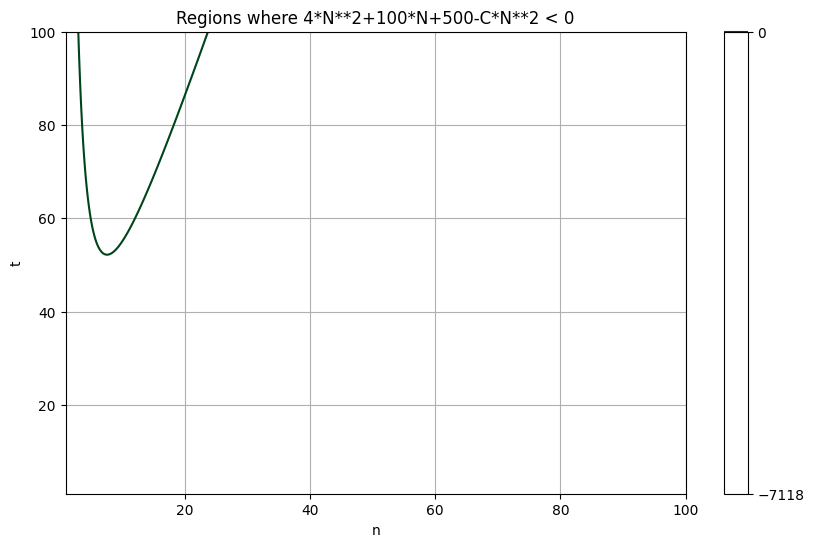

In [5]:
# numpy e matplotlib
import numpy as np
import matplotlib.pyplot as plt


n_range = np.linspace(1,100,400) # crea un vettore da 1 a 100 con 400 numeri
c_range = np.linspace(1,100,400)

# creo una griglia - esplodo le dimensioni, creo una matrice, un reticolo, usando
# non essendo nel mondo simbolico ma computazionale, valuteremo la funzione su tutti questi punti per vedere quando la disuguaglianza e' verificata e quando non lo e'
N, C = np.meshgrid(n_range, c_range)

# f(n)
# vogliamo capire se appartiene all'ordine di O(n**2)
Z = 4*N**3 + 100*N + 500 - C*N**2

# plot
plt.figure(figsize=(10,6))

# definiamo un contorno - contour plot
contour = plt.contour(N,C,Z,levels=[np.min(Z),0],cmap="Greens")
plt.colorbar(contour)

# plottiamo
plt.title("Regions where 4*N**2+100*N+500-C*N**2 < 0")
plt.xlabel("n")
plt.ylabel("t")
plt.grid(True)
plt.show()

l'area verde ci dira'

da n_0 in poi la disuguaglianza e' verificata

quindi f(n) appartiene effettivamente alla famiglia di n^2

in particolare ci interessa quando assume valori negativi e quindi e' verificata la condizione.

a seconda di c avro' degli n_0 diversi




# passiamo alla Ω-notation che e' il lower-bound asintotico.

Data una funzione g(n), denotiamo con Ω(g(n)) l'insieme delle funzioni Ω(g(n)) = {f(n) t.c. esistono delle costanti positive c e n_0 t.c. 0<=c*g(n)<=f(n) \forall n >= n_0 }

es. grafico piu' intuitivo quaderno (1) e (2)

# passiamo alla Θ-notation

data una funzione g(n) denotiamo con Θ(g(n)) l'insieme delle funzioni Θ(g(n)) = {f(n) t.c. esistono delle costanti positive c_1,c_2 e n_0 t.c. 0 <= c_1*g(n) <= f(n) <= c_2*g(n) \forall n>= n_0}

quaderno (3)

da sapere che ci sono anche le notazioni o-piccola e omega-piccola che faremo in futuro

da ricordare sempre la def di O-grande e la consapevolezza che viene usata in maniera impropria al posto di theta-grande

# 14.03.2025 laboratorio - Homework 1 - Insertion Sort in Python

Implementazione di insertion sort in Python.

Importante rispettare categoricamente le condizioni della consegna.

## Consegna

1. Creare uno script in un file chiamato `<nome_cognome_matricola>.py`.
2. Il modulo deve contenere l'implementazione dell'algoritmo Insertion Sort.
3. Il file dovra' contenere la funzione `main(array=[])`.
4. `main(array=[])` ritorna l'array ordinato.
5. Codice ben commentato e facilmente leggibile.
6. Gestione casi limite: array gia' ordinato, ordine inverso, numeri duplicati, array vuoto.
7. Consegna entro il 21.03.2025 AoE Anywhere on Earth - si usa in ricerca per le deadline delle submission delle conferenze.
8. File da uploadare in un google form usando l'account google universitario.

In [11]:
#!/usr/bin/env python3
#
# Homework 1
# Deadline 21.03.2025 AoE Age of Empires

def insertion_sort_originale(lista,n=None):
    """
    implementazione originale
    
    lista: lista da sortare
    n: indice fino al quale sortare, oppure sorta tutta la lista
    """
    # in python se lavoro sulla lista passata in argomento, la lista originale verra' modificata.
    # senza N lo sortiamo tutto
    if n==None:
        n=len(lista)
    # gestiamo altri N sbagliati
    if n>len(lista) or n<0:
        n=len(lista)
    # ciclo principale
    for i in range(1,n):
        valore_attuale = lista[i]
        i_precedente = i-1
        while i_precedente >= 0 and lista[i_precedente] > valore_attuale:
            lista[i_precedente+1]=lista[i_precedente]
            i_precedente=i_precedente-1
        lista[i_precedente+1]=valore_attuale
    return lista

def insertion_sort_copy_list(lista,n=None):
    """
    lavora su una copia della lista per non modificare quella originale passata come argomento.
    
    lista: lista da sortare
    n: indice fino al quale sortare, oppure sorta tutta la lista
    """
    # in python se lavoro sulla lista passata in argomento, la lista originale verra' modificata.
    # quindi ne faccio una copia e lavoro su quella.
    ret_lista = lista.copy()
    # senza N lo sortiamo tutto
    if n==None:
        n=len(ret_lista)
    # gestiamo altri N sbagliati
    if n>len(ret_lista) or n<0:
        n=len(ret_lista)
    # ciclo principale
    for i in range(1,n):
        valore_attuale = ret_lista[i]
        i_precedente = i-1
        while i_precedente >= 0 and ret_lista[i_precedente] > valore_attuale:
            ret_lista[i_precedente+1]=ret_lista[i_precedente]
            i_precedente=i_precedente-1
        ret_lista[i_precedente+1]=valore_attuale
    return ret_lista

def insertion_sort_copy_list_max_min(lista,n=None):
    """
    salta il while se puo' mettere l'elemento all'inizio o alla fine.
    
    lista: lista da sortare
    n: indice fino al quale sortare, oppure sorta tutta la lista
    """
    # in python se lavoro sulla lista passata in argomento, la lista originale verra' modificata.
    # quindi ne faccio una copia e lavoro su quella.
    ret_lista = lista.copy()
    # senza N lo sortiamo tutto
    if n==None:
        n=len(ret_lista)
    # gestiamo altri N sbagliati
    if n>len(ret_lista) or n<0:
        n=len(ret_lista)

    
    # ciclo principale
    for i in range(1,n): 
        valore_attuale = ret_lista[i]
        i_precedente = i-1
        while i_precedente >= 0 and ret_lista[i_precedente] > valore_attuale:
            ret_lista[i_precedente+1]=ret_lista[i_precedente]
            i_precedente=i_precedente-1
        ret_lista[i_precedente+1]=valore_attuale
    return ret_lista



def insertion_sort_save_value(lista,n=None):
    pass
    
def main(array):
    return insertion_sort_zucconico(array)

In [54]:
# Homework 1: Insertion Sort

def insertion_sort_zucconico(lista,n=None):
    """
    - usa una return list vuota, non modifica quella originale.
    - ogni iterazione aggiunge un elemento della lista di input 
      all'indice giusto dell'array da ritornare.
    
    lista: lista da sortare
    n: indice fino al quale sortare, oppure sorta tutta la lista
    """
    if len(lista) == 0:
        return []
    ret_list = [lista[0]]
    
    # senza N lo sortiamo tutto
    if n==None:
        n=len(lista)
    # gestiamo altri N sbagliati
    if n>len(lista) or n<0:
        n=len(lista)

    # scorro tutto l'input
    for i in range(1,n):
        valore_attuale = lista[i]
        # scorro la lista da ritornare per capire a che indice mettere il valore
        for ret_i,val in enumerate(ret_list):
            if valore_attuale <= val:
                break
        else:
            ret_i=ret_i+1
        # inserisco il valore all'indice corretto
        ret_list.insert(ret_i,valore_attuale)
    # popola il resto di ret_list coi valori originali se non era tutta da sortare
    if n != len(lista):
        ret_list+=lista[len(ret_list):]
    return ret_list

def main(lista=[]):
    return insertion_sort_zucconico(lista)

# print(main([]),main([7,3,3,3,5,7,2,3,4,2,5,78,36,6,0]),main([7,6,5,4,3,2,1]),main([1,2,3,4,5,6,7]))

In [3]:
def insertion_sort_zucconico_intervallato(lista,n=None):
    """
    - usa una return list vuota, non modifica quella originale.
    - ogni iterazione aggiunge un elemento della lista di input 
      all'indice giusto dell'array da ritornare.
    - trova l'indice giusto dimezzando intervalli della lista da ritornare.
    
    lista: lista da sortare
    n: indice fino al quale sortare, oppure sorta tutta la lista
    """
    ret_list = [lista[0]]
    
    # senza N lo sortiamo tutto
    if n==None:
        n=len(lista)
    # gestiamo altri N sbagliati
    if n>len(lista) or n<0:
        n=len(lista)

    # scorro tutto l'input
    for i in range(1,n):
        valore_attuale = lista[i]

        # dimezzo intervalli per capire a che indice mettere il valore
        ret_i = dimezza_intervallo_ricorsiva(lista,valore_attuale,0,i-1)
        print(ret_i)
        ret_list.insert(ret_i,valore_attuale)
    # popola il resto di ret_list coi valori originali se non era tutta da sortare
    if n != len(lista):
        ret_list+=lista[len(ret_list):]
    return ret_list

In [ ]:
def dimezza_intervalli(lista,numero):
    """
    ritorna l'indice di numero in una lista crescente dimezzando gli intervalli
    """
    len_lista=len(lista)
    
    sx_start=0
    sx_end=len_lista//2
    dx_start=len_lista//2
    dx_end=len_lista-1
    while len_intervallo>2:
        # valore a sinistra
        if valore_attuale >= lista[sx_start] and valore_attuale <= lista[sx_end]:
            dx_end=sx_end
            sx_end=sx_start+((sx_end-sx_start)//2)
            dx_start=sx_end
        # siamo a destra
        elif valore_attuale >= lista[dx_start] and valore_attuale <= lista[dx_end]:
            sx_start=dx_start
            sx_end=sx_start+((dx_end-dx_start)//2)
            dx_start=sx_end

In [21]:
def dimezza_intervallo_ricorsiva(lista,numero,i_low,i_high):
    """
    nel resto del mondo si chiama binary search. g2k :-)
    """
    # caso base, niente da dimezzare.
    if i_high==i_low:
        if numero >= lista[i_high]:
            return i_high+1
        else:
            return i_high
    else:
        i_mid=i_low+((i_high-i_low)//2)
        sx = {'start': i_low, 'end': i_mid}
        dx = {'start': i_mid+1, 'end': i_high}
        print(sx,dx)
        if numero >= lista[sx['start']] and numero < lista[sx['end']]:
            return dimezza_intervallo_ricorsiva(lista,numero,sx['start'],sx['end'])
        elif numero >= lista[dx['start']] and numero <= lista[dx['end']]:
            return dimezza_intervallo_ricorsiva(lista,numero,dx['start'],dx['end'])
        

In [22]:
def dimezza(lista,numero):
    # iterativo
    i_mid = (i_low+i_high)//2
    while numero != i_mid:
        if numero == i_mid:
            return i_mid
        if numero < i_mid:
            i_high = i_mid - 1
        if numero > i_mid:
            i_low = i_mid + 1
        i_mid = (i_low+i_high)//2

In [36]:
l=make_random_list(20)
print(l)
%time print(insertion_sort_copy_list(l))
%time print(insertion_sort_zucconico(l))

[2, 1, 7, 10, 9, 14, 14, 8, 14, 13, 9, 20, 9, 20, 3, 1, 15, 6, 6, 2]
[1, 1, 2, 2, 3, 6, 6, 7, 8, 9, 9, 9, 10, 13, 14, 14, 14, 15, 20, 20]
CPU times: user 99 μs, sys: 17 μs, total: 116 μs
Wall time: 126 μs
[1, 1, 2, 2, 3, 6, 6, 7, 8, 9, 9, 9, 10, 13, 14, 14, 14, 15, 20, 20]
CPU times: user 184 μs, sys: 0 ns, total: 184 μs
Wall time: 195 μs


In [37]:
%time print(insertion_sort_zucconico_intervallato(l))

0
{'start': 0, 'end': 0} {'start': 1, 'end': 1}
None


TypeError: 'NoneType' object cannot be interpreted as an integer

# Balanced Parenthesis

Viene fornita una stringa con alfabeto di sole parentesi


Ritorna un boolean `is_balanced` che indica se le parentesi matchano in ordine.

In [17]:
def validate_bracket_string(stringa):
    """
    valida una stringa che deve essere di sole parentesi
    """
    pass

In [19]:
import random

def generate_random_bracket_string(length):
    """
    funzione inutile cosi' com'e' fatta perche' non genera (quasi) mai parentesi che matchano
    """
    ret=[]
    alphabet="{}[]()"
    alphabet_length = len(alphabet)
    for i in range(length):
        ret.append(alphabet[random.randint(0,1000)%alphabet_length])
    return "".join(ret)

In [29]:
# scorre tutto l'array
# c e' aperto
# e incrementa o decrementa il conto delle parentesi

# usa un dict per le matching brackets


# insieme:
# - parentesi aperta: va bene
# - parentesi chiusa: c'e' una parentesi aperta prima?
# serve una lista open_brackets=[] per tenere traccia delle parentesi aperte
# faccio un for char in string
#   if is_open: open_brackets.append(char)
#   else:

def is_balanced_fatto_insieme(stringa):
    matching_brackets={"[","]","{","}","(",")"}
    opening_brackets="[{("
    open_brackets=[]
    for char in stringa:
        if char in opening_brackets:
            open_brackets.append(char)
        else:
            # se la lista e' vuota non ci piace
            if len(open_brackets) == 0:
                return False
            # confronto se char matcha l'ultimo elemento di open_brackets usando il dict
            # rimuovo l'ultimo elemento
            if char == matching_brackets[open_brackets.pop()]:
                continue
            else:
                return False
    # controllo che open_brackets e' vuoto
    if len(open_brackets) > 0:
        return False
    
    return True        

# Passiamo all'homework
# Adesso ci confondiamo un po' le idee, vedendo come avremmo dovuto consegnare in un'altra vita.
# Introduciamo la libreria `argparse`



```python
import argparse

def main(s):
    print(s)

# controlla se il file .py e' stato eseguito. non si verifica se il file e' stato importato come libreria.
if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("-s",type=str,help="s e' la stringa da stampare")
    args = parser.parse_args()
    main(args.s)
    main()
```

# Nuovo esercizio: Robot Path Simulator

Programmiamo un robot che si muove in una griglia 2d partendo da 0,0 affacciandosi a nord.

una stringa di istruzione comanda il robot es. F forward L ruota a sx R ruota a destra

una funzione tornera' True se il robot torna a 0,0 e False altrimenti.

nord=(,+1)
est=(+1,)

In [17]:
def is_robot_back_to_start(lista_movimenti):
    # per determinare la direzione uso un array di sommatori/sottrattori di coordinate.
    # avanzare sara' la somma element-wise degli array posizione_attuale e direzione.
    # cambiare direzione sara' incrementare o decrementare l'integer segna-indice 
    #   dell'array direzione.
    # per rendere l'array circolare l'indice verra' ottenuto col modulo: 
    #   indice = posizione_indice % len(direzioni)
    direzioni=[
        # [ x, y]
          [ 0, 1], # nord 
          [-1, 0], # sinistra 
          [ 0,-1], # sud 
          [ 1, 0]  # destra
    ]
    # indice di direzioni[] per ricordare la direzione attuale. inizia orientato verso nord
    direzione_indice=0
    # inizia dal centro
    posizione=[0,0]
    for movimento in lista_movimenti:
        if movimento == "F":
            # avanza
            direzione = direzione_indice % len(direzioni)
            posizione[0] = posizione[0] + direzioni[direzione][0]
            posizione[1] = posizione[1] + direzioni[direzione][1]
        if movimento == "L":
            # gira a sinistra
            direzione_indice = direzione_indice - 1
        if movimento == "R":
            # gira a destra
            direzione_indice = direzione_indice + 1
    if posizione == [0,0]:
        return True
    else:
        return False

In [18]:
movimenti="FFFLLLLLLFFF"
is_robot_back_to_start(movimenti)

True

# 19.03.2025 Merge Sort - Divide and Conquer

Qual'e' il problema di insertion sort?

Andando avanti nell'algoritmo abbiamo sempre piu' valori da comparare

Cerchiamo una strategia che consenta di fare meno comparazioni.

# Divide et Impera

Parentesi sulla ricorsione 

L'idea dietro la funzione di Fibonacci era di trovare l'N-esimo numero della serie.

Ricorsione:
- caso base
- funzione chiama se stessa

Fibonacci:

```python
def fibonacci(n):
  # caso base
  if n==0 or n==1:
    return n
  # funzione chiama se stessa
  return fibonacci(n-1) + fibonacci(n-2)
```

TODO visualizzazione alberi di ricorsione?

Questa va come $n^n$ o e' comunque altamente inefficiente.


Divide et Impera

metodologia divisa in tre fasi

## Divide

Dividiamo il problema in uno o piu' sottoproblemi, che sono delle istanze piu' piccole dello stesso problema.

## Impera - Conquer - Conquista

Risolve il sottoproblema ricorsivamente.

## Combine

L'ultima fase e' quella del Combine.

Le soluzioni al sottoproblema vengono combinate per formare una soluzione del problema originale.


Ora utilizziamo questa tecnica per creare il prossimo algoritmo.

Vogliamo ordinare un array con meno comparazioni di Insertion Sort, nel quale al crescere di N aumenta il numero di comparazioni.

```python
array = [1,3,3,7]
```

Prima fase: lo divido in due sottoarray:

```python
array_1 = [1,3]
array_2 = [3,7]
```

Divido ancora

```python
array_1_1 = [1]
array_1_2 = [3]
array_2_1 = [3]
array_2_2 = [7]
```

Notiamo che questi array con un elemento sono gia' ordinati di loro.

Devo ora andarli ad accorpare nell'ordine giusto - merge.

```python
array_1 = array_1_1 + array_1_2
array_2 = array_2_1 + array_2_1
array = array_1 + array_2
```

TODO disegno albero split e merge

In questo caso l'array era gia' ordinato.

E' importante che durante il merge i sottoarray siano gia' ordinati.

Soprattutto cerchiamo di ottenere un tempo di esecuzione breve.


### Merge-Sort

```python
A = [1,5,10,11,12]
B = [4,7,8,9,20]
```

Mettiamo un puntatore sulle due liste e confrontiamo elemento per elemento element-wise.

Confronto 
```python
# A[0] e B[0] -> A[0]
C = [1]
# A[1] e B[0] -> B[0]
C=[1,4]
# A[1] e B[1] -> A[1]
C=[1,4,5]
# A[2] e B[1]
C=[1,4,5,7]
```

Sposto il puntatore all'indice successivo e confronto.

Sfuttando l'assunzione che i due array siano ordinati, riusciamo ad avere un algoritmo con complessita' $O(n)$.

Meet point q.

#### Divide

Dividiamo l'array a meta' in due: A[q,r] -> A[p,q] e A[q+1,r]

#### Conquer

Sortiamo i due sottoarray con Merge-Sort.

#### Combine

Combiniamo i due sottoarray ordinati.


```python
# nota: stavolta il libro inizia l'array dall'indice 0 anziche' da 1
def merge(A,p,q,r):
    """
        merge di due array
        q = split point
        p = indice iniziale
        r = indice finale
    """
    n_l = q - p+1     # A[p,q]
    n_r = r - q       # A[q+1,r]
    # inizializza array L = A[0:n_l-1]
    # inizializza array R = A[0:n_r-1]
    L = []
    R = []
    for i in range(0,n_l-1):
        L[i] = A[p+i]
    for j in range(0,n_r-1):
        R[j] = A[q+j+1]
    i=0
    j=0
    k=p
    while i<n_l and j<n_r:
        if L[i] <= R[j]:
            A[k] = L[i]
            i=i+1
        else:
            A[k]=R[j]
            j=j+1
        k=k+1
```

```python
def merge_sort(A,p,r):
    # caso base
    if p >= r:
        return
    # definisco il punto centrale dell'array
    q = (p+r) // 2
    merge_sort(A,p,q)
    merge_sort(A,q+1,r)
    merge(A,p,q,r)
    return A

```

In [1]:
def merge(A,p,q,r):
    """
        merge di due array
        q = split point
        p = indice iniziale
        r = indice finale
    """
    n_l = q - p+1     # A[p:q]
    n_r = r - q       # A[q+1:r]
    # inizializza array L = A[0:n_l-1]
    # inizializza array R = A[0:n_r-1]
    L = A[p:q]
    R = A[q+1:r]
    # for i in range(0,n_l-1):
    #     L[i] = A[p+i]
    # for j in range(0,n_r-1):
    #     R[j] = A[q+j+1]
    i=0
    j=0
    k=p
    while i<n_l-1 and j<n_r-1:
        if L[i] <= R[j]:
            A[k] = L[i]
            i=i+1
        else:
            A[k]=R[j]
            j=j+1
        k=k+1

def merge_sort(A,p,r):
    # caso base len(A)=2 p=0,q=2//2=1,r=1
    if p >= r:
        return
    # definisco il punto centrale dell'array
    q = (p+r) // 2
    merge_sort(A,p,q)
    merge_sort(A,q+1,r)
    merge(A,p,q,r)
    return A

In [27]:
array=make_random_list(20)
print(array)
merge_sort(array,0,len(array))
print(array)

[16, 18, 6, 8, 19, 9, 4, 14, 5, 15, 18, 8, 6, 15, 10, 4, 8, 10, 7, 15]
[4, 8, 8, 6, 8, 10, 7, 14, 5, 15, 9, 4, 14, 5, 15, 7, 15, 10, 7, 15]


# 21.03.2025 laboratorio

warm-up binary search

necessario tempo O(log(n))

in: nums int list in ordine crescente

out nums list ritorna l'indice di un numero x se e' in nums oppure -1



In [ ]:
def splitta(nums,x):
    if len(nums)==1:
        if nums[0]==x:
            

In [20]:
def binary_search_naive(nums,x):
    """
    O(n)
    """
    for index,item in enumerate(nums):
        if item == x:
            return index
    return -1

In [19]:
numeri=make_random_list(10)
print(numeri)
numeri=insertion_sort_originale(numeri)
print(numeri)
print(binary_search_naive(numeri,3))

[0, 9, 10, 3, 8, 0, 4, 3, 2, 3]
[0, 0, 2, 3, 3, 3, 4, 8, 9, 10]
3


In [39]:
def dimezza_iterativo(lista,numero):
    # iterativo
    i_low=0
    i_high=len(lista)-1
    i_mid = (i_low+i_high)//2
    while numero != lista[i_mid]:
        if numero == lista[i_mid]:
            return i_mid
        if numero < lista[i_mid]:
            i_high = i_mid - 1
        if numero > lista[i_mid]:
            i_low = i_mid + 1
        i_mid = (i_low+i_high)//2
    else:
        return -1
    return i_mid

In [ ]:
def dimezza_ricorsivo(lista,numero,i_low,i_high):
    i_mid = (i_high-i_low)//2
    if i_high-i_low == 1:
        if lista[i_mid] == numero:
            return i_mid
        else:
            return -1
    else:
        if i_mid 
        return dimezza_ricorsivo(lista,numero,
            

In [40]:
def binary_search_recursive(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            return binary_search_recursive(nums,mid+1,high,x)
        else:
            return binary_search_recursive(nums,low,mid-1,x)
    else:
        return -1

In [35]:
numeri=make_random_list(10)
print(numeri)
numeri=insertion_sort_originale(numeri)
print(numeri)
print(binary_search_naive(numeri,3))
print(dimezza(numeri,4))

[5, 0, 5, 0, 2, 0, 6, 1, 1, 10]
[0, 0, 0, 1, 1, 2, 5, 5, 6, 10]
-1
-1


ogni iterazione dimezza la lunghezza dell'array.

e' implementabile in vari modi

senza sfruttare nessun tipo di proprieta' sull'input scorriamo tutto l'array

se e' ordinato riusciamo a farlo in O(log n) 

nessuno ci dice che e' il tempo migliore

lower bound? dobbiamo dimostrare che non esiste un algoritmo che ci permette di sorpassare log n

cardinalita' delle istanze

secondo esercizio

l'avversario sceglie un indice pivot casualmente, l'array viene diviso al pivot point e le slice vengono scambiate

```python
A=[1,3,4,5,6,34,5,6]
#          ^ pivot
A=[6,34,5,6,1,3,4,5]
```

ora dobbiamo cercare un numero nell'array

domanda: possiamo trovare il numero in tempo logaritmico?



In [45]:
def find_peak_in_sorted_list(nums,low,high):
    for index in range(low,high):
        if arr[index]>arr[index+1]:
            return index
    
def binary_search_recursive(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2
        if arr[high] <= arr[low]:
            pivot=find_peak_in_sorted_list(lista,low,high)
            
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            return binary_search_recursive(nums,mid+1,high,x)
        else:
            return binary_search_recursive(nums,low,mid-1,x)
    else:
        return -1

In [47]:
def binary_search_pivot(nums,low,high,x):
    if low <= high:
        mid = (low+high)//2            
        if nums[mid]==x:
            return mid
        if nums[low] < nums[mid]:
            if nums[low] <= x <= nums[mid]:
                high = mid - 1
            else:
                low = mid + 1
        else:
            if nums[mid] <= x <= nums[high]:
                low = mid + 1
            else:
                high = mid - 1
    return -1

altro problema

problema di two-sum?

abbiamo due varianti a seconda che la lista sia ordinata o non ordinata

la domanda e' dato un array v di valori interi +/- e un numero x, esistono due numeri in v la cui somma sia x?

variante non ordinata N.O.: O(n) tempo e O(n) spazio aggiuntivo (che sia della lunghezza dell'input)
variante ordinata O.: O(n) tempo e O(1) spazio aggiuntivo - la monotonia e' fondamentale

In [ ]:
# risolviamo il problema su una lista ordinata
# usiamo la disuguaglianza triangolare per scartare alcuni indici
def two_sum_ordinato(nums,somma):
    # |a+b| <= |a| + |b|
    # indice somma 
    for i,num in enumerate(nums):
        max

In [48]:
# lista ordinata
# fatto insieme in classe
def two_sum_ordinato_due_puntatori(nums,somma):
    # mantieni due puntatori e scorri la lista dai due lati
    l=0
    h=len(v)-1
    summ=v[l]+v[h]
    if summ==x:
        return v[l], v[h]
    # undershooting
    if summ < x:
        l=l+1
    # overshooting
    if summ > x:
        h=h-1

domande da farsi

il tempo e' il migliore che possiamo ottenere?

possiamo fare una domanda bidimensionale

se non permetto spazio aggiuntivo O(n) ma impongo O(1), allora il tempo potra' mai essere O(n) o sara' O(n^2)?

con tre numeri e' un problema aperto da decadi risolvibile in O(n^2) e ci si chiede se si possa risolvere in meno di O(n^2)

# 25.03.2025 Object-Oriented Programming

Florin

Immaginiamo di dover programmare un'applicazione suddivisa in diversi moduli

un modulo rappresenta un'entita'

questo paradigma differisce da quello procedurale perche' si basa sul concetto di classe o entita'

una classe rappresenta una collezione di oggetti

es. classe persona

una classe ha delle proprieta' chiamate attributi.

es. persona ha nome ed eta'

ha anche delle funzioni proprie della classe

dovremo trovare un modo per istanziare questa entita' persona in un oggetto specifico

cerchiamo il parallelismo in python

In [4]:
# si usa la keywork class
class Persona():
    # dobbiamo dire a questa classe cosa fare quando viene istanziata
    # questo e' il compito di una funzione speciale chiamata costruttore, che viene chiamata quando la classe viene istanziata in un oggetto
    # e' una 'magic function'
    # self e' un parametro speciale che deve essere sempre menzionato nelle funzioni di una classe, serve a referenziare le funzioni di un'istanza.
    # non deve chiamarsi self per forza, e' una convenzione.
    def __init__(self,nome,eta):
        self.nome = nome
        self.eta = eta

# per istanziare la classe
p = Persona("ciro",25)

astrazione:

si usa un modello per rappresentare qualcosa

incapsulamento:

gli attributi sono specifici della classe e sono quindi incapsulati in essa.

fino a qui abbiamo solo immagazzinato dei dati, non c'e' niente di speciale rispetto a un dict.

ora definiamo dei metodi specifici della classe

In [6]:
# si usa la keywork class
class Persona():
    # dobbiamo dire a questa classe cosa fare quando viene istanziata
    # questo e' il compito di una funzione speciale chiamata costruttore, che viene chiamata quando la classe viene istanziata in un oggetto
    # e' una 'magic function'
    # self e' un parametro speciale che deve essere sempre menzionato nelle funzioni di una classe, serve a referenziare le funzioni di un'istanza.
    # non deve chiamarsi self per forza, e' una convenzione.
    def __init__(self,nome,eta):
        self.nome = nome
        self.eta = eta

    def presentarsi(self):
        print(f"Ciao, mi chiamo {self.nome} e ho {self.eta} anni")

# per istanziare la classe
p = Persona("ciro",25)
p.presentarsi()

Ciao, mi chiamo ciro e ho 25 anni


## Ereditarieta'

possiamo creare delle relazioni tra classi e qui entra in gioco un altro concetto che e' l'eredita'

per esempio voglio creare la classe Studente, il quale e' anche una Persona.

e' una relazione che si chiama "is a": Studente is a Persona.

in python si definisce questa relazione come

```python
class Studente(Persona):
```

Questo significa che il costruttore dovra' istanziare un oggetto Persona con tutti i suoi parametri.

in python esiste una funzione `super()` che ritorna l'oggetto della super-classe

In [9]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,etc)
        self.matricola = matricola

ora potro' chiamare comunque i metodi della superclasse dall'istanza della sottoclasse.

pero' vorrei modificare uno di questi metodi.

## Polimorfismo

classi distinte posono utilizzare funzioni con lo stesso nome ma con implementazioni diverse.

Fare questo si chiama "overloading". In python si chiama "overriding".

In [13]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        print(f"Ciao, mi chiamo {self.nome}, ho {self.eta} anni e la mia matricola e' {self.matricola}.")

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino, ho 23 anni e la mia matricola e' 234823.


In [15]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.


definiamo funzioni per printare i nostri oggetti

In [19]:
class Studente(Persona):
    def __init__(self,nome,eta,matricola):
        super().__init__(nome,eta)
        self.matricola = matricola
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")
    def __str__(self):
        return f"{self.nome} {self.eta} {self.matricola}"

    # si usa per debugging, se non e' definito __str__() viene chiamato __repr__()
    def __repr__(self):
        return f"Persona(nome={self.nome})"

s = Studente("lino",23,234823)
s.presentarsi()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.


## Esercizio

Aggiungere un attributo alla classe Studente che rappresenta la lista degli esami passati dallo studente con nome e voto.

Aggiungere tre metodi alla classe:
- inserire nuovo esame
- stampare tutti gli esami
- stampare la media dei voti

In [26]:
class Esame:
    def __init__(self,nome,voto):
        self.nome = nome
        self.voto = voto
    def __str__(self):
        return f"Esame di {self.nome} voto {self.voto}"
        
class Studente(Persona):
    def __init__(self,nome,eta,matricola,esami=[]):
        super().__init__(nome,eta)
        self.matricola = matricola
        self.esami=esami
    def presentarsi(self):
        # posso anche chiamare lo stesso metodo da super()
        super().presentarsi()
        print(f"La mia matricola e' {self.matricola}.")
    def __str__(self):
        return f"{self.nome} {self.eta} {self.matricola}"

    # si usa per debugging, se non e' definito __str__() viene chiamato __repr__()
    def __repr__(self):
        pass

    def inserisci_esame(self,nome_esame,voto):
        self.esami.append(Esame(nome_esame,voto))
    def stampa_esami(self):
        for esame in self.esami:
            print(esame)
    def stampa_media_esami(self):
        somma=0
        for esame in self.esami:
            somma=somma+esame.voto
        media=somma/len(self.esami)
        print(media)
s = Studente("lino",23,234823)
s.presentarsi()
s.inserisci_esame("analisi 1",26)
s.inserisci_esame("algebra",18)
s.inserisci_esame("fondamenti",0)
s.stampa_esami()
s.stampa_media_esami()

Ciao, mi chiamo lino e ho 23 anni
La mia matricola e' 234823.
Esame di analisi 1 voto 26
Esame di algebra voto 18
Esame di fondamenti voto 0
14.666666666666666


## Decoratori

voglio che le proprieta' del'oggetto siano private, questo in python si esprime con doppio underscore.

in questo caso diventano inaccessibili dall'esterno, riferendosi a `oggetto.__attributo` si avra' un errore.

tramite il decoratore `@property` posso chiamare funzioni come se fossero proprieta'. il comportamento di questo metodo si chiama getter.

quando si fa questo bisogna definire anche un setter, altrimenti si avra' un errore.

es

```python
@property
def name(self):
    return self.__name
```


vale anche per settare valori, in tal caso il metodo e' un setter
```python
@age.setter
def age(self,new_age):
    assert new_age > 0, "l'eta' deve essere positiva"
    print(f"cambio eta' da {self.__age} a {new_age}")
    self.__age=new_age
```

## Classmethod

un metodo di una classe che non necessita che la classe venga istanziata per essere chiamato.

es

```python
class Studente(Persona):
    nome_universita = "La Sapienza"

print(Studente.nome_universita)
```

per effettuare operazioni su questo dato serve un classmethod

```python
class Studente(Persona):
    nome_universita = "La Sapienza"

    @classmethod
    def cambia_universita(cls,new_uni):
        cls.nome_universita = new_uni

# si puo' usare in un'istanza o sulla classe per applicarlo a tutte le istanze
s.cambia_universita("Tor Vergata")
Studente.cambia_universita("Tor Vergata")
```

come si comporta quando viene cambiato nell'istanza o nella classe? quando viene istanziata e' un puntatore che poi viene cambiato verso un'altra variabile nell'istanza, mentre il valore viene cambiato 

puo' essere usato per cambiare globalmente un parametro di tutte le classi.

es. lo uso per contare le istanze di un tipo incrementando un contatore di classe da `__init__()`



implementiamo una classe per una rete neurale

una rete neurale e' un agglomerato di neuroni anche detto (?)

in pratica modelliamo un neurone come un numero reale

di per se' non fa nulla

la potenza nasce quando ne mettiamo insieme tanti, rappresentiamoli come nodi e li interconnettiamo in qualche modo

banalmente si definiscono dei layer e si collegano tutti i neuroni di un layer al successivo

una rete neurale non e' altro che una funzione da R^n a R^m

abbiamo un vettore in input e uno di output

le interconnessioni sono pesate, su ogni ramo branch c'e' un valore che ne determina il suo peso.

quindi vari input -> vari pesi -> prossimo neurone

il valore e' un prodotto scalare degli input coi loro pesi

$x_1=1.5$ 

$x_2=-2$

$x_3=w_1x_1+w_2x_2$

$(1.5 2)$

si puo' esprimere in maniera vettoriale $w^Tx$

$x_3=\sigma(x_3 primo)$

$\sigma$ non e' lineare

c'e' una famiglia di funzioni che servono ad applicare la non linearita' a $\sigma$

es. ReLU: 0 se x=0 x se x>0

tutti i neuroni hanno la stessa funzione $\sigma$

token

come si scelgono i pesi dei rami?

lo scopo di queste funzioni e' di essere usate in reti neurali

possiamo aggiungere attributi di classe, che non e' una classe derivata da un'entita' reale ma la usiamo come fosse un contenitore di funzioni.

funzioni di attivazione. es. revu il threshold e' zero

quindi possiamo avere una classe


In [43]:
import numpy as np

class Attivazioni:
    # decoratore usato spesso per la progettazione concettuale
    # un metodo statico e' un metodo specifico di una certa classe che pero' non agisce sulle proprieta' dell'istanza.
    # nei metodi statici non conta l'istanza dell'oggetto, per questo non serve self.
    @staticmethod
    def ReLU(x):
        return np.maximum(0,x)

    @staticmethod
    def sigmoid(x):
            return 1 / (1 + np.exp(-x))

i neuroni a cascata layer hanno relazioni di precedenza con altri layer

primo layer

hidden layer


a priori non sappiamo quanti layer potrebbe avere una rete neurale, quindi modelliamo un layer

l'unica cosa che caratterizza un layer sono i pesi dei rami.

In [31]:
class LinearLayer:
    def __init__(self,input_size,output_size):
        self.weights = np.random.rand(input_size,output_size)
    def forward(self,x):
        return np.dot(x,self.weights)

In [33]:
l=LinearLayer(2,3)

In [34]:
x=np.array([1.5,-2])
l.forward(x)

array([-0.83932302,  0.35877164, -1.32739563])

In [46]:
class MyNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_layer = LinearLayer(input_size,hidden_size)
        self.output_layer = LinearLayer(hidden_size,output_size)
        # mappo la funzione di attivazione desiderata
        self.act = Attivazioni.ReLU

    def forward(self,x):
        # applico la non linearita'
        out = self.act(self.input_layer.forward(x))
        return self.act(self.output_layer.forward(out))

In [47]:
nn = MyNN(2,3,1)

importante nel modellare e' dividere il problema in problemi piu' piccoli da modellare come classi.

# 26.03.2025 Analisi di merge-sort

1. divide and conquer
2. recursive
3. stabile -> lista di punti nel piano cartesiano
4. not in-place (al contrario di e.g. insertion sort)
5. "x" time-complexity

vogliamo capire la complessita' computazionale T(n), come al solito prendendo come riferimento il caso peggiore.



In [4]:
def merge_sort(A):
    # C_1
    n = len(A)
    if n < 2:
        return
    # definisco il punto centrale dell'array
    mid = n // 2
    left = array of 
    right = array
    # fine C_1

    # C_2 * n
    for i in range(0,mid-1):
        left[i] = A[i]
    for i in range(mid,n-1):
        right[i-mid]=A[i]
    # fine C_2

    # chiamata ricorsiva - recursive call
    merge_sort(left)  # T(n/2)
    merge_sort(right) # T(n/2)

    # merge
    merge(left,right) #C_3n+C_4

SyntaxError: invalid syntax (3430819796.py, line 8)

## Time Complexity

$$2T(\frac{n}{2}) + (C_2+C_3)n+(C_4+C_1)$$
$$= 2T(\frac{n}{2})+C'n$$
$$T(n)=2[2T(\frac{n}{4})+C'\frac{n}{2}]+2C'n$$
$$=4T(\frac{n}{4})+2C'n$$
$$=8T(\frac{n}{8})+3C'n$$
$$=16T(\frac{n}{16})+4C'n$$
$$=2^nT(\frac{n}{2^n}+KC'n$$
$$=\frac{n}{2^n}=1 => 2^n=n1 => K=\log{n}$$

manca un pezzo

$$=O(n\log{n})$$
-> $T(n) \le c n \log{n}$ if $n\ge n_0$

ci sono almeno 4 modi di fare merge sort, tra i quali il "master theory" che e' stato rinominato per via del linguaggio offensivo

## Space Complexity

diagramma di albero del merge-sort che splitta l'array in due fino alle foglie - casi base

ogni livello ha un nome L1 L2 L3

### Partiamo dalla versione "naive"

Lo spazio ausiliario che utilizziamo usando gli array left e right:

L0 - array originale
L1 - due mezzi array
L2 - quattro quarti di array

il livello di ricorsione dipende dalla lunghezza dell'array ed e' $\log{n}$

la memoria usata sara' n=len(A) per ogni livello di ricorsione

quindi lo spazio aggiuntivo sara' $O(n\log{n})$

### Cerchiamo Altre Versioni

divido l'array non ordinato e poi procedo in una sola direzione mantenendo a ogni livello solamente l'array di una direzione.

In questa maniera si ottimizza lo spazio:

L0=n L1=n/2 L2=n/2 =>  n+n/2+n/4 = S(n) # serie geometrica

n(1+1/2+1/4)

=> 1n<=S(n)<2n


es. problema di google che ha un array enorme e deve essere diviso su diverse macchine fisiche. 

merge sort e' comodo perche' puo' essere distribuito in una rete.

## Comparison

merge-sort 

time complexity -> ϑ(n\log{n})


caso migliore? array gia' ordinato [1,2,3,4] e' indifferente perche' si arriva comunque al caso base con lo stesso numero di passaggi

anche nel caso migliore la time complexity sara' $n\log{n}$

space complexity -> O(n)

nell'insertion sort

time complexity -> O(n^2) worst-case O(n) best-case
space -> O(1)

quindi paragonando insertion e merge sort, notiamo che merge sort e' piu' robusto come time complexity, ma ha bisogno di piu' spazio.

in generale e' buono paragonare gli algoritmi per comprendere quali sono i trade-off e scegliere quello giusto a seconda dei casi. 

le domande su merge-sort all'esame capitano SEMPRE.

# 28.03.2025 venerdi' laboratorio

primo algoritmo: 2-sum su lista non sortata

secondo: frequenza di un elemento >= n/2

terzo: ordinare una lista disordinata con solo 3 valori



# 02.04.2025 Strutture Dati

- array
- pila
- coda
- lista concatenata - linked list
- matrici

tavola

| algoritmo | array | lista c |
| insert | O(n) | O(1) |
| delete | O(n) | O(1) o O(n) |
| search | O(n) | O(n) |

una lista ordinata si puo' rappresentare come un albero di ricerca

## Binary Search Tree

l'albero si naviga a destra o sinistra

a sinistra i numeri minori e a destra i maggiori

ricercare in un albero ha un costo di O(log(n)) perche' ogni iterazione e' un livello dell'albero e il numero massimo di livelli e' log(n).

Sia x un nodo in un albero di ricerca binario.

Se y e' un nodo nel sottoalbero destro di x, allora la chiave di x sara' minore o uguale della chiave di y.

Chiaramente se y e' un nodo nel sottoalbero sinistro di x, allora sara' vero il contrario, cioe' che la chiave di x sara' maggiore o uguale della chiave di y.

Consideriamo come navigarlo, come inserire o rimuovere un nodo.

Ci sono due problemi:
- e' molto meno banale
- se facciamo troppe insertion dobbiamo ri-bilanciarlo
- differiamo alberi bilanciati, completi, o nessuno dei due

Non e' completamente vero che impiega O(log(n)). Se l'albero e' completamente bilanciato impieghera' O(n).

bilanciato: tutti i livelli sono riempiti.

completo: tutte le foglie sono piene.

Se non e' bilanciato si sviluppa solo da una parte e causa problemi.

e.s. dopo insertion va bilanciato altrimenti degenera in uno di questi due casi.

es. collezionando e inserendo timestamp nell'albero essi saranno sempre successivi.

Oggi vogliamo pero' arrivare a un costo costante.

Per fare questo posso creare una tabella a indirizzamento diretto.

Sara' questa che ci portera' all'hashing e agli hashmaps.

### Tabella a Indirizzamento Diretto

L'idea e' che c'e' qualche universo che chiamiamo U, le cui chiavi effettive sono un sottoinsieme.

Avro' quindi un array di chiavi, che non saranno sempre numeri ordinabili.

Voglio quindi una funzione di hash che associ alle chiavi dei numeri.

e.s. conto la lunghezza di una stringa.

Il problema e' che possono capitare delle collisioni.

Per risolvere questo problema posso fare tante cose, che rientrano in due categorie:

1. una funzione di hashing iniettiva - migliorare le proprieta' statistiche di h() - e.s. gia' sommare i valori dei caratteri - per quanto puo' essere buona potro' osservare delle collisioni.
2. strategie
3. - linear probing - primary clustering - le chiavi si accumulano negli stessi punti ed e' poi difficile capire qual'e' quella giusta.
   - lista concatenata, il problema e' che nel caso peggiore in cui molte chiavi si riferiscono alla stessa cella impieghera' O(n) perche' tutta la lista linkata va scorsa
   - cose piu' complicate, quadratic probing

secondary clustering

tiny pointers

una proprieta' importante e' il numero di celle m, riducendolo si avranno piu' collisioni. il vantaggio e' che occupero' meno spazio.

Se aumento m avro' meno collisioni ma occupero' meno spazio.

normalmente sono astratte al programmatore ma vanno tenute a mente

il costo di un insert e delete da un hashmap in python e' O(1)



es. ricerco una chiave "giovanni":
- faccio l'hash di "giovanni"
- la chiave hashata punta a una lista linkata nella quale c'e' "giovanni"

mettiamo caso che "mariana" abbia lo stesso hash.

aggiungendo "mariana" si avra' lo steso hash e verra' aggiunta alla lista linkata dov'e' anche "giovanni"

nel worst case tutti gli elementi hanno lo stesso hash e fanno parte di una sola lista linkata per la quale il problema della ricerca si ripete spostandosi su questa lista.

i set di fatto sono hashmap semplificati, perche' hanno solo l'appartenenza o meno all'insieme.



In [9]:
def my_hash(stringa):
    # voglio un algoritmo di hash che causi collisioni per tutti gli anagrammi di stringa
    # somma valori ascii? collisioni non volute
    pass
    
def is_anagram(stringa1,stringa2):
    if len(stringa1) == len(stringa2):
        for char in stringa1:
            if char not in stringa2:
                return False
        else:
            return True
    else:
        return False

# Problema: raggruppare anagrammi
def raggruppa_anagrammi(A=[]):
    mappa={}
    ret=[]
    for stringa in A:
        hash_stringa=my_hash(stringa)
        if hash_stringa in mappa:
            mappa[hash_stringa] = mappa[hash_stringa].append(stringa)
        else:
            mappa[hash_stringa] = [ stringa ]
    for k,stringhe in mappa:
        ret_stringa=[]
        for stringa in stringhe:
            ret_stringa.append(stringa)
        ret.append(ret_stringa)
    return ret

In [5]:
is_anagram("ciao","ocsa")

False

nella vita ci sono tre tipi di problemi, che si risolvono in tre modi:

1. programmazione dinamica: vi dice malissimo, potrebbe essere gia' troppo tardi per risolvere il problema
2. hashing
3. sorting
4. hashing e sorting

In [15]:
# fatto in classe

# voglio ricondurre una stringa in una forma "anagrammabile" ovvero trovare il simbolo di tutte le combinazioni dei suoi caratteri
# quindi sortiamo la stringa e la compariamo. usiamo la stringa sortata come chiave.
# 

def anagrams(lista_stringhe):
    d = dict()
    for stringa in lista_stringhe:
        str_sorted = "".join(sorted(stringa))
        if str_sorted not in d.keys():
            d[str_sorted] = [ stringa ]
        else:
            d[str_sorted].append(stringa)
    return d.values()
        

In [14]:
lista_input=["cat","tan","tac","cta"]

anagrams(lista_input)

dict_values([['cat', 'tac', 'cta'], ['tan']])

esercizio

data una stringa, trovare la sottostringa piu' lunga senza caratteri che si ripetono.

es. s="abcabcbb"

output: 3


In [20]:
# uso gli index e salvo gli index
# oppure salvo liste di char/sottostringhe
# oppure entrambi - uso un index e salvo sottostringhe

def sottostringa_non_ripetuta_index(stringa):
    substr=[]
    substr_s=[]
    start=0
    for i in range(0,len(stringa)-1):
        if c in stringa[start:i]:
            start=i

def sottostringa_non_ripetuta_substr(stringa):
    sottostringhe=[]
    start=0
    for char in stringa:
        if 

SyntaxError: invalid syntax (3075456062.py, line 17)

In [19]:
s="abcabcbb"
sottostringa_non_ripetuta(s)

[['a', 'b', 'c'],
 ['a', 'b', 'c'],
 ['a', 'b', 'c'],
 ['b', 'c'],
 ['b', 'c'],
 ['b', 'c'],
 ['b'],
 ['b']]